# **About this notebook**



# **Objective**




# Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt

# Linear regression 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load the data 

In [2]:
train_df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')
display(train_df.head(50).style.set_caption('Train data'))

test_df = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')
display(test_df.head().style.set_caption('Test data'))

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

# Exploratory data analysis 

To have a first glance of the data, we will do some exploratory data analysis (EDA). 

First, we noticed that the test_df is around 8.3% of the size of the train_df.



In [3]:
train_df.shape 


(375734, 246)

In [4]:
test_df.shape

(31354, 245)

Format the 'startdate' colummn to 'datetime' 

In [5]:
train_df['startdate'] = pd.to_datetime(train_df['startdate'])
test_df['startdate'] = pd.to_datetime(test_df['startdate'])

In [6]:
# group start_date by month and check averages of the other columns
train_df.groupby(pd.Grouper(key='startdate',freq='M')).mean()
test_df.groupby(pd.Grouper(key='startdate',freq='M')).mean()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
startdate,,,,,,,,,,,,,,,,,,,,,
2022-11-30,391395.0,0.592766,0.517964,354.747025,23.089105,24.886314,22.268392,23.044110,20.879891,23.563319,...,1.717000,-54.984333,6.681333,45.268667,-35.728333,12.138333,4.089667,-10.018333,-1.957000,26.068000
2022-12-31,391425.5,0.592766,0.517964,245.532173,15.757553,17.624336,16.239224,17.330387,15.727886,17.332059,...,41.689355,-14.438387,43.683871,28.827419,-7.318065,8.813548,-28.902581,25.854194,-20.691935,16.260323


In [7]:
columns_nans = train_df.columns[train_df.isna().any()].tolist()


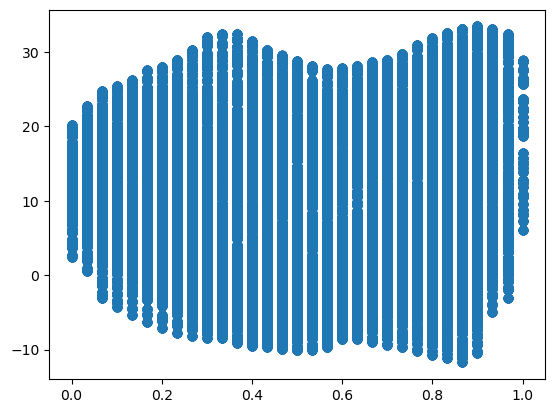

-11.72

In [8]:
plt.scatter(x=train_df['lon'], y=train_df['ccsm30'])
plt.show()
train_df['ccsm30'].min()

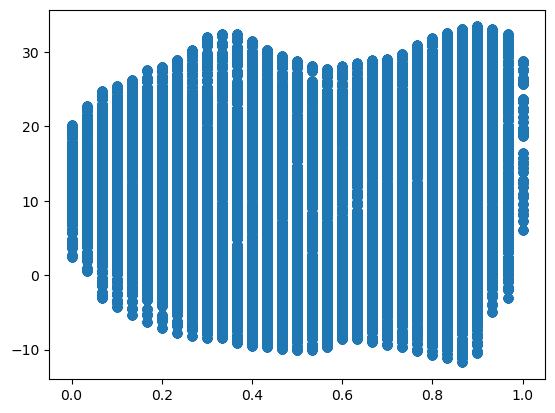

In [9]:
plt.scatter(x=train_df['lon'], y=train_df['nmme0-tmp2m-34w__ccsm30'])
plt.show()

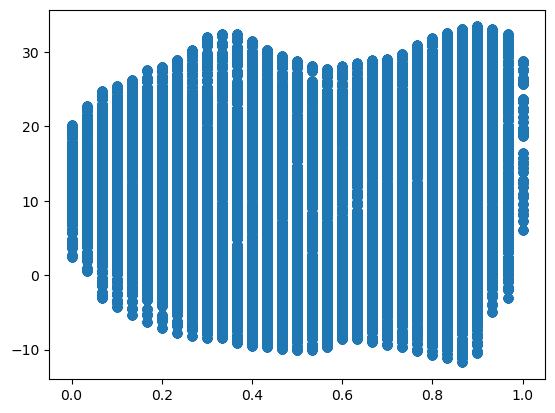

In [10]:
plt.scatter(x=train_df['lon'], y=train_df['nmme0-tmp2m-34w__ccsm30'])

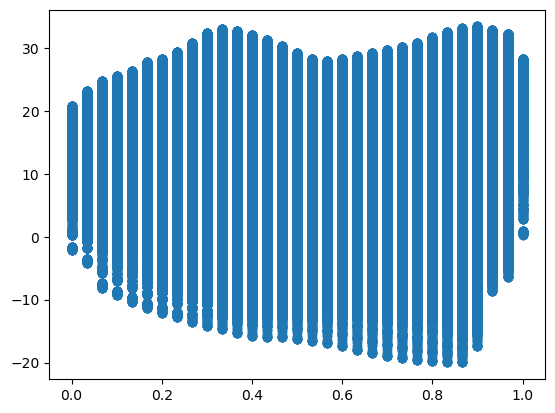

In [11]:
plt.scatter(x=train_df['lon'], y=train_df['nmme-tmp2m-56w__ccsm3'])

Check how many rows per day 

We decided to drop the collumns with the NaNs

In [12]:
nan_features = train_df.columns[train_df.isna().any()].tolist()
nan_features


['nmme0-tmp2m-34w__ccsm30',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-prate-34w__ccsm3',
 'nmme0-prate-56w__ccsm30',
 'nmme0-prate-34w__ccsm30',
 'nmme-prate-56w__ccsm3',
 'nmme-tmp2m-34w__ccsm3',
 'ccsm30']

In [13]:
avg= (train_df['ccsm30'].max()) + (train_df['ccsm30'].min())/2
avg


27.53

In [14]:
nan_features = train_df.columns[train_df.isna().any()].tolist()
nan_features

['nmme0-tmp2m-34w__ccsm30',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-prate-34w__ccsm3',
 'nmme0-prate-56w__ccsm30',
 'nmme0-prate-34w__ccsm30',
 'nmme-prate-56w__ccsm3',
 'nmme-tmp2m-34w__ccsm3',
 'ccsm30']

In [15]:
def preprocessing(df):

    # converting the date column to a true date object (so we can perform date calculations on it)
    df['startdate']=pd.to_datetime(df['startdate'])
    
    # address NaNs in the ccsm30
    avg= (df['ccsm30'].max()) + (df['ccsm30'].min())/2
    df['ccsm30']= df.ccsm30.fillna(avg)
    df['nmme0-tmp2m-34w__ccsm30'] = df['nmme0-tmp2m-34w__ccsm30'].fillna(avg)
    df['nmme0-prate-56w__ccsm30'] = df['nmme0-prate-56w__ccsm30'].fillna(avg)
    df['nmme0-prate-34w__ccsm30'] = df['nmme0-prate-34w__ccsm30'].fillna(avg)   
    #avg2= (df['ccsm3'].max()) (df['ccsm3'].min())/2
    df['nmme-tmp2m-56w__ccsm3']= df['nmme-tmp2m-56w__ccsm3'].fillna((df['nmme-tmp2m-56w__ccsm3'].max())+ (df['nmme-tmp2m-56w__ccsm3'].min())/2)
    df['nmme-prate-34w__ccsm3']= df['nmme-prate-34w__ccsm3'].fillna((df['nmme-prate-34w__ccsm3'].max()) + (df['nmme-prate-34w__ccsm3'].min())/2)
    df['nmme-prate-56w__ccsm3']= df['nmme-prate-56w__ccsm3'].fillna((df['nmme-prate-56w__ccsm3'].max()) + (df['nmme-prate-56w__ccsm3'].min())/2)
    df['nmme-tmp2m-34w__ccsm3']= df['nmme-tmp2m-34w__ccsm3'].fillna((df['nmme-tmp2m-34w__ccsm3'].max()) + (df['nmme-tmp2m-34w__ccsm3'].min())/2)
    
    # group by lat and lon, and by week (starts on a Sunday)
    df_grp=df.groupby(['lat', 'lon', pd.Grouper(key='startdate', freq="W")]).mean()
    df_grp=df_grp.reset_index()

    # replace nulls that we discovered (only needed in the test dataset)
    #df_grp['lat']=df_grp.lat.fillna(41)

    # feature engineering the date column—turning it into an integer preresentation
    earliest_date=pd.to_datetime('08/31/2016') 
    df_grp['startdate_int'] = (df_grp['startdate'] - earliest_date).dt.days

    # selecting subset of features to experiment with
    #df_grp= df_grp[['startdate', 'startdate_int', 'lat', 'lon', 'cancm30','cancm40','ccsm30','ccsm40','cfsv20','gfdlflora0','gfdlflorb0','gfdl0','nasa0','nmme0mean','elevation__elevation', 'contest-tmp2m-14d__tmp2m']] #We don't have tempt
    #df_grp=df_grp[['startdate_int', 'ccsm30',[columns_no_nans]]]
    df_grp= df_grp.drop(['startdate'], axis=1)
    
    # divide the output for convenience
    features, target=df_grp.iloc[:, df_grp.columns != 'contest-tmp2m-14d__tmp2m'], df_grp.loc[:,['contest-tmp2m-14d__tmp2m']]

    # note: to get groups:
    #df_grp.get_group((list(df_grp.groups)[0]))

    return features, target, df_grp 

Note: ['contest-tmp2m-14d__tmp2m'] is not in test_df

In [16]:
train_df2= preprocessing(train_df)
type(train_df2)

tuple

In [17]:
df_train_features, df_train_target, df_grp = preprocessing(train_df)
#print(df_grp.loc[2, 'startdate'])


# **Model fit: Linear Regression**"

In [18]:
reg = LinearRegression().fit(df_train_features.values, df_train_target.values)
reg.score(df_train_features.values, df_train_target.values)

0.9833931939097081

In [19]:
predicted_results_train=reg.predict(df_train_features.values)
df_grp['contest-tmp2m-14d__tmp2m']=predicted_results_train
df_grp['contest-tmp2m-14d__tmp2m'].describe()


count    53970.000000
mean        11.900413
std          9.755282
min        -18.422331
25%          4.811831
50%         12.475124
75%         19.446749
max         37.381721
Name: contest-tmp2m-14d__tmp2m, dtype: float64

In [20]:

df_results = df_grp[['contest-tmp2m-14d__tmp2m', 'index']]
df_results.loc['index']= df_results['index'].apply(np.int32)
df_results.loc['contest-tmp2m-14d__tmp2m']= df_results['contest-tmp2m-14d__tmp2m'].astype('float')
#df['Fee'] = df['Fee'].astype('int')
#print(type(df_results.loc[:,1])) 
df_results.to_csv('submission.csv',index=False)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [21]:
df_results.head(50)

,contest-tmp2m-14d__tmp2m,index
0,27.678640,3.0
1,26.968954,10.0
2,26.473493,17.0
3,26.696210,24.0
4,26.869022,31.0
5,25.222946,38.0
6,23.952711,45.0
7,22.594760,52.0
8,19.950417,59.0
9,16.451295,66.0


In [22]:
# Check nans
test_nan_columns = test_df.columns[test_df.isna().any()].tolist()
print(test_nan_columns)

[]


In [23]:
print(test_df.columns.tolist())

['index', 'lat', 'lon', 'startdate', 'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0', 'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0', 'nmme0-tmp2m-34w__nmme0mean', 'contest-wind-h10-14d__wind-hgt-10', 'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__cancm4', 'nmme-tmp2m-56w__ccsm3', 'nmme-tmp2m-56w__ccsm4', 'nmme-tmp2m-56w__cfsv2', 'nmme-tmp2m-56w__gfdl', 'nmme-tmp2m-56w__gfdlflora', 'nmme-tmp2m-56w__gfdlflorb', 'nmme-tmp2m-56w__nasa', 'nmme-tmp2m-56w__nmmemean', 'contest-rhum-sig995-14d__rhum', 'nmme-prate-34w__cancm3', 'nmme-prate-34w__cancm4', 'nmme-prate-34w__ccsm3', 'nmme-prate-34w__ccsm4', 'nmme-prate-34w__cfsv2', 'nmme-prate-34w__gfdl', 'nmme-prate-34w__gfdlflora', 'nmme-prate-34w__gfdlflorb', 'nmme-prate-34w__nasa', 'nmme-prate-34w__nmmemean', 'contest-wind-h100-14d__wind-hgt-100', 'nmme0-prate-

In [24]:
#test_df['contest-tmp2m-14d__tmp2m'] 
def preprocessing_test(df):

    # converting the date column to a true date object (so we can perform date calculations on it)
    df['startdate']=pd.to_datetime(df['startdate'])
    
    # address NaNs in the ccsm30
    #avg= (df['ccsm30'].max()) + (df['ccsm30'].min())/2
    #df['ccsm30']= df.ccsm30.fillna(avg)

    # group by lat and lon, and by week (starts on a Sunday)
    df_grp=df.groupby(['lat', 'lon', pd.Grouper(key='startdate', freq="W")]).mean()
    df_grp=df_grp.reset_index()

    # feature engineering the date column—turning it into an integer preresentation
    earliest_date=pd.to_datetime('08/31/2016') 
    df_grp['startdate_int'] = (df_grp['startdate'] - earliest_date).dt.days

    # selecting subset of features to experiment with
    #df_grp=df_grp[['startdate', 'startdate_int', 'lat', 'lon', 'cancm30','cancm40','ccsm30','ccsm40','cfsv20','gfdlflora0','gfdlflorb0','gfdl0','nasa0','nmme0mean','elevation__elevation']] #We're removing ['contest-tmp2m-14d__tmp2m']
    df_grp= df_grp.drop(['startdate'], axis=1)
    
    # divide the output for convenience
    # We choose this column 'nmme-tmp2m-34w__ccsm3' as target as a first try
    #features, target=df_grp.iloc[:, 1:-1], df_grp.iloc[:,-1]
    features, target=df_grp.iloc[:, df_grp.columns != 'nmme-tmp2m-34w__ccsm3'], df_grp.loc[:,'nmme-tmp2m-34w__ccsm3']

    # note: to get groups:
    #df_grp.get_group((list(df_grp.groups)[0]))

    return features, target, df_grp 

In [25]:
df_test_features, df_test_target, df_grp_test=preprocessing_test(test_df)


In [26]:
reg_test = LinearRegression().fit(df_test_features.values, df_test_target.values)
reg_test.score(df_test_features.values, df_test_target.values)

0.9999961192694886

In [27]:
predicted_results_test=reg_test.predict(df_test_features.values)
df_grp_test['predicted_results']=predicted_results_test
df_grp_test['predicted_results'].describe()

count    4626.000000
mean       13.081602
std         7.245225
min        -3.333515
25%         7.580479
50%        13.083710
75%        18.108239
max        28.887250
Name: predicted_results, dtype: float64

In [28]:
#from sklearn.model_selection import cross_val_score
cross_val_score(reg, df_test_features, df_test_target, cv=10).mean()

0.9999915343216992